<a href="https://colab.research.google.com/github/harikrishna099388/sqlite-task7/blob/main/task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib


In [2]:
import sqlite3
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')
sales_data = [
    ('Apple', 10, 0.5),
    ('Banana', 20, 0.3),
    ('Orange', 15, 0.4),
    ('Apple', 5, 0.5),
    ('Banana', 10, 0.3),
    ('Orange', 5, 0.4)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()

In [3]:
import pandas as pd
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)
print(df)

  product  total_qty  revenue
0   Apple         15      7.5
1  Banana         30      9.0
2  Orange         20      8.0


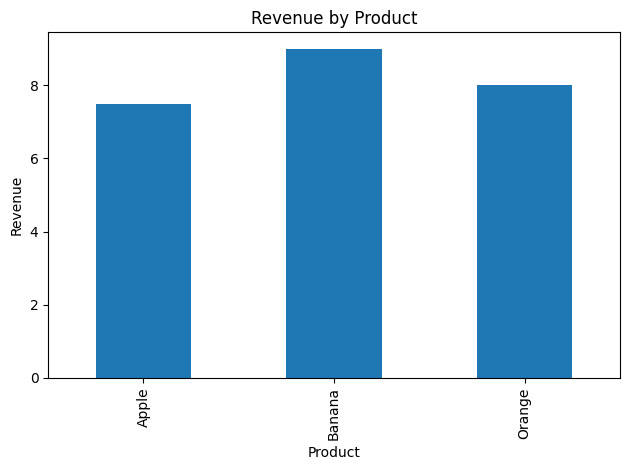

In [4]:
import matplotlib.pyplot as plt
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()